#Importing Dataset

1. Clean Diabetes dataset using tidy data principles. There is not a lot of cleaning necessary but think about what each column means. Do they make sense?

2. You will need to wrangle continuous columns into categorical ones that make sense. Make sure you cite why you did what you did.

3. Conduct Exploratory Data Analysis using Visualizations and t-tests to test your initial hypotheses/research questions. Your RQs can and will morph and change appropriately as you go through the process of analysis.
Conduct Multiple Linear Regression and ANOVA modeling on the dataset. What do each modeling step reveal? Post hoc tests are a must!

4. No logistic regression models will be accepted. We are only dealing with categorical data as predictors in this class, not as outcomes.

5. I am more concerned with your process than than specific right outcomes (though of course, they are secondarily important)


6. Write up: Write in detail the steps that you took to clean the data and why. Justify why you think your model is the right solution. If you feel like there were solutions that you identified but couldn't achieve, please write that out as well. There are no page limits.

In [ ]:
#Importing Dataset
from google.colab import files 
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%pip install scipy
!pip install seaborn

In [ ]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#Exploratory Data Analysis

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#In this dataset, there are 768 obsearvations and 9 characteristics. The 9 characteristics include 1 dependent variable and 8 independent variables.
df.shape

(768, 9)

In [ ]:
#There is no variable column has null or missing values. 
#Most columns are integers
#BMI and DPF are floats/decimals
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Insulin has the greatest mean and variance
#Most features shows its minimum value is 0, which probably different from the reality, like IBM, Glucose, Bloodpressure, Insulin are impossible. So there might be some mistakes or anamoly we can further investigage it 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#There is no null value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

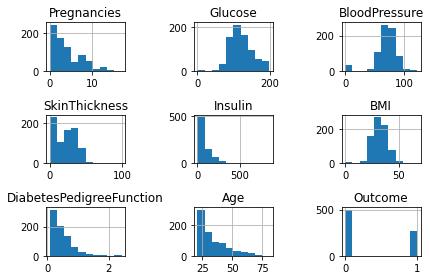

In [ ]:
df.hist()
plt.tight_layout()

0    500
1    268
Name: Outcome, dtype: int64

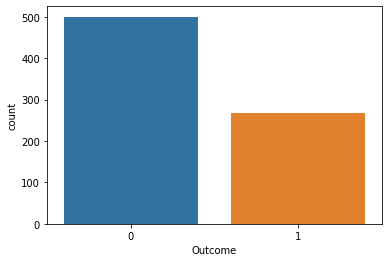

In [ ]:
sns.countplot(df.Outcome)
df.Outcome.value_counts()

1. In these 9 columns, there is 1 dependent to show the predictive result of diabetic and 8 columns of independent variables to cause diabetic happens
2. The predictive 'Outcome' of diabetes is discrete number
3. This dataset is unbalanced
4. There are a few things we can can explore by age, bmi, blood pressure, Skinthickness

#Correlation between different columns

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

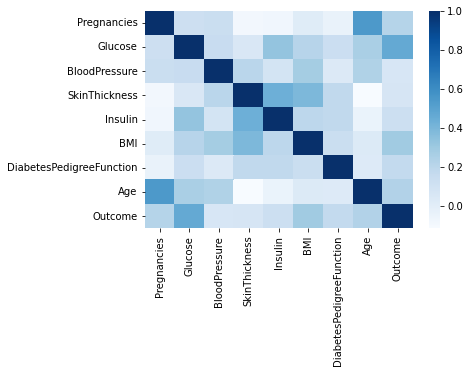

In [ ]:
corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, cmap='Blues',annot=False,
         yticklabels=corr.columns)


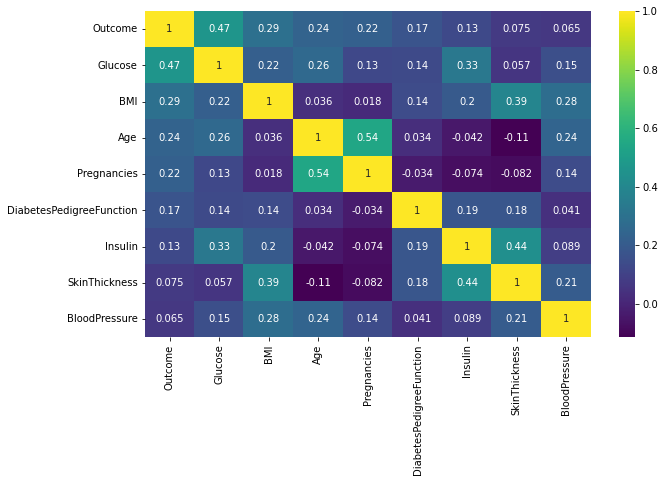

In [ ]:
k = 9 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

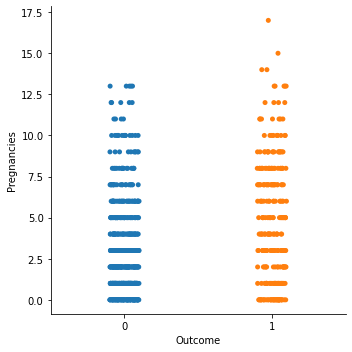

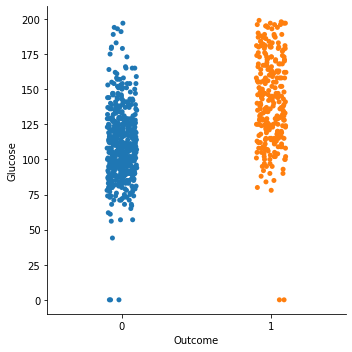

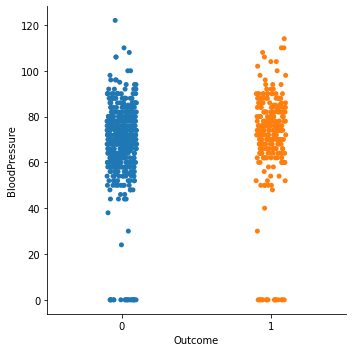

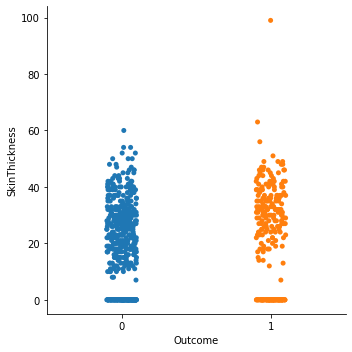

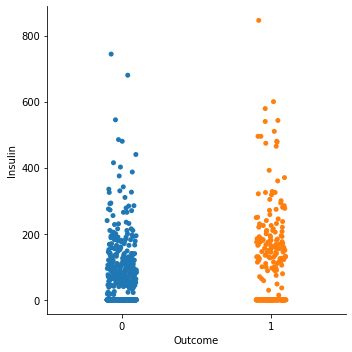

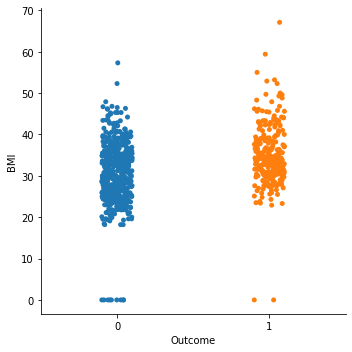

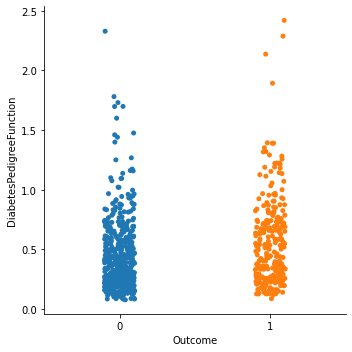

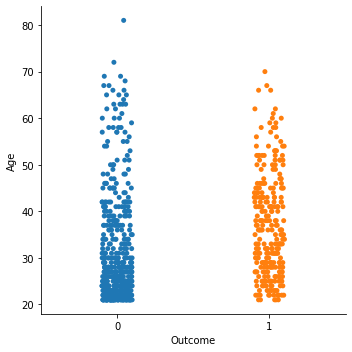

In [ ]:
#How data impacts on the possibility of diabetes   
for col in df.columns:
    if col != "Outcome":
        sns.catplot("Outcome", col, data = df)

1. Based on visualization aboved, we see there are some outliers in the relationship between 8 variables and possibility of getting diabetes. 
2. Based on the heatmap, 'Glucose', 'BMI' and 'Insulin' are top 3 variables impact on the possibility of Diabetes. 

Thus, it's good to see how different variables correlates with each other. 

#Data Distribution

## The impact of BMI and Insulin level on one's Glucose Level

## ANOVA and Regression

The Distribution of Glucose Values

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#range of possible values in Glucose 
df_gluc = df[['Glucose','Outcome']]
df_gluc.reset_index(inplace = True)
df_gluc.drop(['index'], axis = 1, inplace = True)
df_gluc = df_gluc.groupby(['Glucose']).count().reset_index()
df_gluc.describe()

,Glucose,Outcome
count,136.000000,136.000000
mean,128.808824,5.647059
std,41.416317,3.905418
min,0.000000,1.000000
25%,95.750000,3.000000
50%,129.500000,5.000000
75%,163.250000,8.000000
max,199.000000,17.000000


In [ ]:
df_flattern_1 = []

for i in range(len(df_gluc['Outcome'])):
    for l in range(df_gluc.loc[i,'Outcome']):
        df_flattern_1.append(df_gluc.loc[i,'Glucose'])

df_gluc_pre = pd.DataFrame({"Glucose": df_flattern_1})

print(sum(df_flattern_1)/len(df_flattern_1))
print(len(df_flattern_1))
print("median is", df_gluc_pre.Glucose.median())
df_gluc_pre.head()

120.89453125
768
median is 117.0


,Glucose
0,0
1,0
2,0
3,0
4,0


The Distribution of BMI Values

In [ ]:
df_bmi = df.loc[:,['BMI','Outcome']]
df_bmi.reset_index(inplace = True)
df_bmi.drop(['index'], axis = 1, inplace = True)
df_bmi = df_bmi.groupby(['BMI']).count().reset_index()
df_bmi.describe()

,BMI,Outcome
count,248.000000,248.000000
mean,33.705645,3.096774
std,9.080065,2.359988
min,0.000000,1.000000
25%,26.575000,1.000000
50%,33.650000,2.000000
75%,39.825000,4.000000
max,67.100000,13.000000


In [ ]:
df_flattern_2 = []

for i in range(len(df_bmi['Outcome'])):
    for l in range(df_bmi.loc[i,'Outcome']):
        df_flattern_2.append(df_bmi.loc[i,'BMI'])

df_bmi_pre = pd.DataFrame({"BMI": df_flattern_2})

print(sum(df_flattern_2)/len(df_flattern_2))
print(len(df_flattern_2))
print("median is", df_bmi_pre.BMI.median())
df_bmi_pre.head()

31.992578124999977
768
median is 32.0


,BMI
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


## The Distribution of Insulin

In [ ]:
df_insu = df[['Insulin','Outcome']]
df_insu.reset_index(inplace = True)
df_insu.drop(['index'], axis = 1, inplace = True)
df_insu = df_insu.groupby(['Insulin']).count().reset_index()
df_insu.head()

,Insulin,Outcome
0,0,374
1,14,1
2,15,1
3,16,1
4,18,2


In [ ]:
df_flattern_3 = []

for i in range(len(df_insu['Outcome'])):
    for l in range(df_insu.loc[i,'Outcome']):
        df_flattern_3.append(df_insu.loc[i,'Insulin'])

df_insu_pre = pd.DataFrame({"Insulin": df_flattern_3})

print(sum(df_flattern_3)/len(df_flattern_3))
print(len(df_flattern_3))
print("median is", df_insu_pre.Insulin.median())
df_insu_pre.head()

79.79947916666667
768
median is 30.5


,Insulin
0,0
1,0
2,0
3,0
4,0


# Regression

In [ ]:
df_tr = pd.DataFrame({"BMI":  df_flattern_2,
                      "Insu": df_flattern_3})



In [ ]:
# get a regression analysis for the same anova table
from sklearn.preprocessing import PolynomialFeatures
import scipy.special
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_all = pd.concat([df_bmi_pre, df_insu_pre, df_gluc_pre])
X = df_tr[['BMI','Insu']]
y = df_flattern_1

reg = LinearRegression()
reg.fit(X,y)


LinearRegression()

In [ ]:
print("Intercept", reg.intercept_)
print("Coefficient")
list(zip(X, reg.coef_))

Intercept 13.0518338985311
Coefficient


[('BMI', 3.2245772339746486), ('Insu', 0.05864898270405665)]

In [ ]:
# model 

In [ ]:
#y = 13.05 + 3.22*BMI + 0.06*Insu

# OLS Model with Interaction & ANCOVA


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import scipy.special
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = df_tr[['BMI','Insu']]
y = df_flattern_1


Xb = sm.add_constant(X)
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_tr = poly.fit_transform(Xb)
X = pd.concat([Xb,pd.DataFrame(X_tr,columns=poly.get_feature_names())],1)
mod = sm.OLS(y, X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.239e+04
Date:                Sun, 10 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:06:08   Log-Likelihood:                -2250.6
No. Observations:                 768   AIC:                             4509.
Df Residuals:                     764   BIC:                             4528.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8326      0.542     19.991      0.000       9.769      11.896
BMI            0.9365      0.013     70.531      0.000       0.910       0.963
Insu           0.1106      0.003     35.109      0.000       0.104       0.117
x0            10.8326      0.542     19.991      0.000       9.769      11.896
x1             0.9365      0.013     70.531      0.000       0.910       0.963
x2             0.1106      0.003     35.109      0.000       0.104       0.117
x0 x1          0.9365      0.013     70.531      0.000       0.910       0.963
x0 x2          0.1106      0.003     35.109      0.000       0.104       0.117
x1 x2         -0.0052      0.000    -30.023      0.000      -0.006      -0.005
==============================================================================
Omnibus:                      599.306   Durbin-Watson:                   0.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31787.875
Skew:                           3.007   Prob(JB):                         0.00
Kurtosis:                      33.939   Cond. No.                     1.93e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.78e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## ANOVA


In [ ]:
#bin 1 low insulin, low BMI 

In [ ]:
df.Insulin.median()

30.5

In [ ]:
df.BMI.median()

32.0

In [ ]:
df_bin1 = df[(df.BMI <32) & (df.Insulin <30.5)
                                         ].loc[:, ['Glucose', 'Outcome']]

df_bin1.reset_index(inplace = True)

df_bin1 = df_bin1.drop('index', axis = 1)

print(df_bin1.describe())

df_bin1 = df_bin1.groupby(['Glucose']).count().reset_index()

          Glucose     Outcome
count  208.000000  208.000000
mean   114.105769    0.240385
std     29.968395    0.428348
min      0.000000    0.000000
25%     95.500000    0.000000
50%    111.000000    0.000000
75%    129.000000    0.000000
max    197.000000    1.000000


In [ ]:


bin1 = []

for i in range(len(df_bin1['Outcome'])):
    for l in range(df_bin1.loc[i,'Outcome']):
        bin1.append(df_bin1.loc[i,'Glucose'])

df_bin1_pre = pd.DataFrame({"Glucose": bin1})

print(sum(bin1)/len(bin1))
print(len(bin1))

df_bin1_pre.head()

114.10576923076923
208


,Glucose
0,0
1,0
2,44
3,57
4,68


In [ ]:
#bin 2 low inulin, high BMI

In [ ]:
df_bin2 = df[(df.BMI >=32) & (df.Insulin <30.5)
                                         ].loc[:, ['Glucose', 'Outcome']]

df_bin2.reset_index(inplace = True)

df_bin2 = df_bin2.drop('index', axis = 1)

print(df_bin2.describe())


df_bin2 = df_bin2.groupby(['Glucose']).count().reset_index()



          Glucose     Outcome
count  176.000000  176.000000
mean   124.420455    0.511364
std     35.872384    0.501297
min      0.000000    0.000000
25%    102.000000    0.000000
50%    123.000000    1.000000
75%    146.000000    1.000000
max    199.000000    1.000000


In [ ]:
bin2 = []

for i in range(len(df_bin2['Outcome'])):
    for l in range(df_bin2.loc[i,'Outcome']):
        bin2.append(df_bin2.loc[i,'Glucose'])

df_bin2_pre = pd.DataFrame({"Glucose": bin2})

print(sum(bin2)/len(bin2))
print(len(bin2))

df_bin2_pre.head()

124.42045454545455
176


,Glucose
0,0
1,0
2,0
3,57
4,61


In [ ]:
#bin 3 high insulin, low BMI

In [ ]:
df_bin3 = df[(df.BMI <32) & (df.Insulin >=30.5)
                                         ].loc[:, ['Glucose', 'Outcome']]

df_bin3.reset_index(inplace = True)

df_bin3 = df_bin3.drop('index', axis = 1)

print(df_bin3.describe())

df_bin3 = df_bin3.groupby(['Glucose']).count().reset_index()


          Glucose     Outcome
count  165.000000  165.000000
mean   117.187879    0.206061
std     28.711260    0.405706
min     56.000000    0.000000
25%     96.000000    0.000000
50%    110.000000    0.000000
75%    136.000000    0.000000
max    197.000000    1.000000


In [ ]:


bin3 = []

for i in range(len(df_bin3['Outcome'])):
    for l in range(df_bin3.loc[i,'Outcome']):
        bin3.append(df_bin3.loc[i,'Glucose'])

df_bin3_pre = pd.DataFrame({"Glucose": bin1})

print(sum(bin3)/len(bin3))
print(len(bin3))

df_bin3_pre.head()

117.18787878787879
165


,Glucose
0,0
1,0
2,44
3,57
4,68


In [ ]:
#bin 4 high insulin, high BMI

In [ ]:
df_bin4 = df[(df.BMI >=32) & (df.Insulin >=30.5)
                                         ].loc[:, ['Glucose', 'Outcome']]

df_bin4.reset_index(inplace = True)

df_bin4 = df_bin4.drop('index', axis = 1)

print(df_bin4.describe())

df_bin4 = df_bin4.groupby(['Glucose']).count().reset_index()

          Glucose     Outcome
count  219.000000  219.000000
mean   127.301370    0.429224
std     31.385448    0.496099
min     68.000000    0.000000
25%    102.000000    0.000000
50%    123.000000    0.000000
75%    151.000000    1.000000
max    198.000000    1.000000


In [ ]:
bin4 = []

for i in range(len(df_bin4['Outcome'])):
    for l in range(df_bin4.loc[i,'Outcome']):
        bin4.append(df_bin4.loc[i,'Glucose'])

df_bin4_pre = pd.DataFrame({"Glucose": bin4})

print(sum(bin4)/len(bin4))
print(len(bin4))

df_bin4_pre.head()

127.3013698630137
219


,Glucose
0,68
1,71
2,74
3,77
4,77


In [ ]:
df_visual = pd.DataFrame({ "Insulin": ['Low']*(len(df_bin1_pre['Glucose']) +
                                                        len(df_bin2_pre['Glucose'])) +
                                            ['High']*(len(df_bin3_pre['Glucose']) +
                                                        len(df_bin4_pre['Glucose']))
                          ,
                          "BMI": ['Low']*len(df_bin1_pre['Glucose']) +
                                                       ['High']*len(df_bin2_pre['Glucose']) + 
                                                       ['Low']*len(df_bin3_pre['Glucose']) +
                                                       ['High']*len(df_bin4_pre['Glucose'])
                                                       ,
                          "Glucose_Level":df_bin1_pre['Glucose'].values.tolist() +
                                          df_bin2_pre['Glucose'].values.tolist() + 
                                          df_bin3_pre['Glucose'].values.tolist() + 
                                          df_bin4_pre['Glucose'].values.tolist()                                           
                          })

In [ ]:
df_visual.head()

,Insulin,BMI,Glucose_Level
0,Low,Low,0
1,Low,Low,0
2,Low,Low,44
3,Low,Low,57
4,Low,Low,68


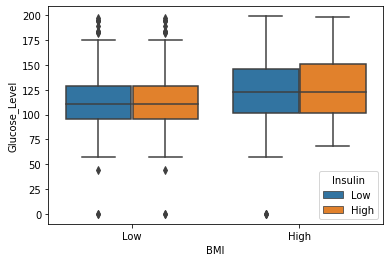

In [ ]:
sns.boxplot(y='Glucose_Level', x="BMI", hue = "Insulin",
              data= df_visual)

In [ ]:
# test normality

In [ ]:
#kolmogorov-smirnov, anderson-darling, wilks-shapiro etc for normal distribution

from scipy.stats import anderson

result1 = anderson(df_visual[(df_visual.BMI == 'Low') & (df_visual.Insulin == 'Low')].Glucose_Level,dist='norm')
result2 = anderson(df_visual[(df_visual.BMI == 'High') & (df_visual.Insulin == 'Low')].Glucose_Level,dist='norm')
result3 = anderson(df_visual[(df_visual.BMI == 'Low') & (df_visual.Insulin == 'High')].Glucose_Level,dist='norm')
result4 = anderson(df_visual[(df_visual.BMI == 'High') & (df_visual.Insulin == 'High')].Glucose_Level,dist='norm')

if result1[0] > result1[1][-3]:
    print('The glucose level in bin1  is not normally distributed')
else:
    print('The glucose level in bin1 is noramlly distributed')
if result2[0] > result2[1][-3]:
    print('The glucose level in bin2 is not normally distributed')
else:
    print('The glucose level in bin2 is noramlly distributed')
if result3[0] > result3[1][-3]:
    print('The glucose level in bin3 is not normally distributed')
else:
    print('The glucose level in bin3 is noramlly distributed')
if result4[0] > result4[1][-3]:
    print('The glucose level in bin4 is not normally distributed')
else:
    print('The glucose level in bin4 is noramlly distributed')



The glucose level in bin1  is not normally distributed
The glucose level in bin2 is noramlly distributed
The glucose level in bin3 is not normally distributed
The glucose level in bin4 is not normally distributed


In [ ]:
# test equal variance

from scipy.stats import levene

# Create three arrays for each sample:
ctrl = df_visual[(df_visual.BMI == 'Low') & (df_visual.Insulin == 'Low')].Glucose_Level
trt1 = df_visual[(df_visual.BMI == 'Low') & (df_visual.Insulin == 'High')].Glucose_Level
trt2 = df_visual[(df_visual.BMI == 'High') & (df_visual.Insulin == 'Low')].Glucose_Level
trt3 = df_visual[(df_visual.BMI == 'High') & (df_visual.Insulin == 'High')].Glucose_Level

# Levene's Test in Python with Scipy:
stat, p = levene(ctrl, trt1, trt2, trt3)

print(stat, p)
print("since p = 0.041 < 0.05", "the variances are not equal")

3.903119300173253 0.008754541292658954
since p = 0.041 < 0.05 the variances are not equal


In [ ]:
# continue anova because its robust

In [ ]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Glucose_Level ~ (BMI) + \
            (Insulin)+ \
            (BMI):(Insulin)', data=df_visual).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Glucose_Level   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     9.796
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           2.37e-06
Time:                        18:06:37   Log-Likelihood:                -3952.2
No. Observations:                 811   AIC:                             7912.
Df Residuals:                     807   BIC:                             7931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   127.3014      2.143     59.399      0.000     123.095     131.508
BMI[T.Low]                  -13.1956      3.071     -4.297      0.000     -19.223      -7.168
Insulin[T.Low]               -2.8809      3.211     -0.897      0.370      -9.183       3.421
BMI[T.Low]:Insulin[T.Low]     2.8809      4.470      0.645      0.519      -5.893      11.655
==============================================================================
Omnibus:                       18.602   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.524
Skew:                           0.056   Prob(JB):                     1.17e-08
Kurtosis:                       4.034   Cond. No.                         6.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
BMI,1.0,28749.842015,28749.842015,28.581599,1.170204e-07
Insulin,1.0,392.042783,392.042783,0.389749,5.326080e-01
BMI:Insulin,1.0,417.837213,417.837213,0.415392,5.194285e-01
Residual,807.0,811750.342107,1005.886421,NaN,NaN


# Welch's T test

In [ ]:
lowBMI = df[(df.BMI <32)].loc[:, ['Glucose', 'Outcome']]

lowBMI.reset_index(inplace = True)

lowBMI = lowBMI.drop('index', axis = 1)

lowBMI = lowBMI.groupby(['Glucose']).count().reset_index()

lowBMI.head()

,Glucose,Outcome
0,0,2
1,44,1
2,56,1
3,57,1
4,68,2


In [ ]:
lowBMILst = []

for i in range(len(lowBMI['Outcome'])):
    for l in range(lowBMI.loc[i,'Outcome']):
        lowBMILst.append(lowBMI.loc[i,'Glucose'])

lowBMIDf = pd.DataFrame({"Glucose": lowBMILst})

print(sum(lowBMILst)/len(lowBMILst))
print(len(lowBMILst))

lowBMIDf.head(10)

115.46916890080429
373


,Glucose
0,0
1,0
2,44
3,56
4,57
5,68
6,68
7,71
8,71
9,71


In [ ]:
highBMI = df[(df.BMI >=32)].loc[:, ['Glucose', 'Outcome']]

highBMI.reset_index(inplace = True)

highBMI = highBMI.drop('index', axis = 1)

highBMI = highBMI.groupby(['Glucose']).count().reset_index()

highBMI.head(10)

,Glucose,Outcome
0,0,3
1,57,1
2,61,1
3,62,1
4,65,1
5,67,1
6,68,1
7,71,1
8,74,1
9,75,1


In [ ]:
highBMILst = []

for i in range(len(highBMI['Outcome'])):
    for l in range(highBMI.loc[i,'Outcome']):
        highBMILst.append(highBMI.loc[i,'Glucose'])

highBMIDf = pd.DataFrame({"Glucose": highBMILst})

print(sum(highBMILst)/len(highBMILst))
print(len(highBMILst))

highBMIDf.head(10)

126.01772151898734
395


,Glucose
0,0
1,0
2,0
3,57
4,61
5,62
6,65
7,67
8,68
9,71


In [ ]:
lowInsu = df[(df.BMI <30.5)].loc[:, ['Insulin', 'Outcome']]

lowInsu.reset_index(inplace = True)

lowInsu = lowInsu.drop('index', axis = 1)

lowInsu = lowInsu.groupby(['Insulin']).count().reset_index()

lowInsu.head()

,Insulin,Outcome
0,0,177
1,15,1
2,16,1
3,22,1
4,23,2


In [ ]:
lowInsuLst = []

for i in range(len(lowInsu['Outcome'])):
    for l in range(lowInsu.loc[i,'Outcome']):
        lowInsuLst.append(lowInsu.loc[i,'Insulin'])

lowInsuDf = pd.DataFrame({"Insulin": lowInsuLst})

print(sum(lowInsuLst)/len(lowInsuLst))
print(len(lowInsuLst))

lowInsuDf.head(10)

56.29595015576324
321


,Insulin
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
highInsu = df[(df.BMI >=30.5)].loc[:, ['Insulin', 'Outcome']]

highInsu.reset_index(inplace = True)

highInsu = highInsu.drop('index', axis = 1)

highInsu = highInsu.groupby(['Insulin']).count().reset_index()

highInsu.head()

,Insulin,Outcome
0,0,197
1,14,1
2,18,2
3,32,1
4,36,1


In [ ]:
highInsuLst = []

for i in range(len(highInsu['Outcome'])):
    for l in range(highInsu.loc[i,'Outcome']):
        highInsuLst.append(highInsu.loc[i,'Insulin'])

highInsuDf = pd.DataFrame({"Insulin": highInsuLst})

print(sum(highInsuLst)/len(highInsuLst))
print(len(highInsuLst))

highInsuDf.head(10)

96.67785234899328
447


,Insulin
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Text(0.5, 1.0, 'Independent Sample T-Test')

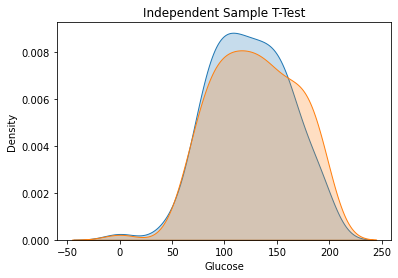

In [ ]:
sns.kdeplot(lowBMI.Glucose, shade=True)
sns.kdeplot(highBMI.Glucose, shade=True)
plt.title("Independent Sample T-Test")

In [ ]:
tStat, pValue = stats.ttest_ind(lowBMIDf.Glucose, highBMIDf.Glucose, equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) 

P-Value:3.96478823255824e-06 T-Statistic:-4.6471515861238135


# Point and Confidence Interval Estimates

In [ ]:
print("Glucose Point Estimate-lowBMI Group: ", format(lowBMIDf.Glucose.mean(), '.2f'))
print("Glucose Point Estimate-highBMI Group: ", format(highBMIDf.Glucose.mean(), '.2f'))

Glucose Point Estimate-lowBMI Group:  115.47
Glucose Point Estimate-highBMI Group:  126.02


In [ ]:
print("Glucose Point Estimate-lowInsulin Group: ", format(lowInsuDf.Insulin.mean(), '.2f'))
print("Glucose Point Estimate-highInsulin Group: ", format(highInsuDf.Insulin.mean(), '.2f'))

Glucose Point Estimate-lowInsulin Group:  56.30
Glucose Point Estimate-highInsulin Group:  96.68


In [ ]:
import scipy.stats as st

#define sample data
low = lowBMIDf.Glucose
high = highBMIDf.Glucose

#create 95% confidence interval 
lowBMI = st.t.interval(alpha=0.95, df=len(low)-1, loc=np.mean(low), scale=st.sem(low))
output = ["%.2f" % elem for elem in lowBMI]

print("95% confidence Interval for the lowBMI Group:",  output[0], '-', output[1])

highBMI = st.t.interval(alpha=0.95, df=len(high)-1, loc=np.mean(high), scale=st.sem(high))
output = ["%.2f" % elem for elem in highBMI]

print("95% confidence Interval for the highBMI Group:", output[0], '-', output[1])

95% confidence Interval for the lowBMI Group: 112.47 - 118.46
95% confidence Interval for the highBMI Group: 122.71 - 129.33


In [ ]:
#define sample data
low = lowInsuDf.Insulin
high = highInsuDf.Insulin

#create 95% confidence interval 
lowInsu = st.t.interval(alpha=0.95, df=len(low)-1, loc=np.mean(low), scale=st.sem(low))
output = ["%.2f" % elem for elem in lowInsu]

print("95% confidence Interval for the lowInsu Group:",  output[0], '-', output[1])

highInsu = st.t.interval(alpha=0.95, df=len(high)-1, loc=np.mean(high), scale=st.sem(high))
output = ["%.2f" % elem for elem in highInsu]

print("95% confidence Interval for the highInsu Group:", output[0], '-', output[1])

95% confidence Interval for the lowInsu Group: 45.55 - 67.04
95% confidence Interval for the highInsu Group: 85.19 - 108.17


# Effect Size - Cohen's d

In [ ]:
from numpy import mean
from numpy import var
from math import sqrt

def cohend(d1, d2):
    n1, n2 = len(d1), len(d2)
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    u1, u2 = mean(d1), mean(d2)
    return abs((u1 - u2) / s)

In [ ]:
print("Effect size between the lowBMI and highBMI group: ", "{0:.2f}".format(cohend(lowBMIDf.Glucose, highBMIDf.Glucose)))

Effect size between the lowBMI and highBMI group:  0.33


In [ ]:
print("Effect size between the lowInsu and highInsu group: ", "{0:.2f}".format(cohend(lowInsuDf.Insulin, highInsuDf.Insulin)))

Effect size between the lowInsu and highInsu group:  0.36


# Power Analysis

In [ ]:
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

In [ ]:
# required sample size
effect_size = 0.33
alpha = 0.05
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))
print("Type II Power: {0:.2f}".format(1-power))

Required sample size: 145.11
Type II Power: 0.20


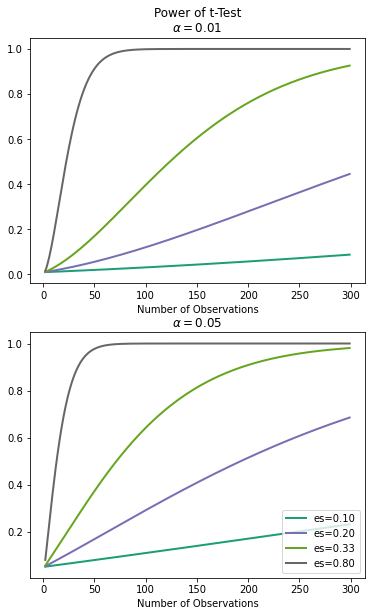

In [ ]:
# power vs. number of observations visualization

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 300),
                                 effect_size=np.array([0.1, 0.2, 0.33, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 300),
                                 effect_size=np.array([0.1, 0.2, 0.33, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 2)

